# Find the duplicates

***

After a power analysis, our strategy has been to face this task relying on a data structure that we already knew about and adapting it to our purposes. More specifically we implemented a **Bloom Filter-look-like** algorithm to fetch all the duplicate passwords stored in the txt file. This particular space-efficient data structure is used to test whether an element is a member of a set. The price we pay for efficiency is that it is probabilistic in nature meaning that there might be some **False Positive** results. False positive means, it might tell that given passwords are duplicate even if they actually aren't.


The important features of this data structure are:
+ Ability of representing a set with an arbitrarily **large** number of elements.
+ Adding an element never fails. However, the false positive rate increases steadily as elements are added until all bits in the array are set to 1, at which point all queries produce a positive result.
+ Never generates false negative result, i.e., telling you that a password does not have duplicates when it actually has.

### How does it work?

1. The algorithm is based on a huge **bit array** all set to zero. The bigger the bit array is, the less false positives will be detected.


2. When checking a password, the **hash function** converts the string to a very big number. In our case we assured that each character is mapped to a unique prime number computed starting by obtaining the **unicode** value of the character and finding the closest prime number to it that is not already stored. The final hash value is the multiplication of all the values of the characters contained in the password. The advantage of working with multiplication between **prime numbers** is to ensure greater uniqueness of the hash value of each password.


3. After computing the hashes k times with k different seeds (but always the same k different seeds for every other password), with the modulo operation (the rest of the division by the size of the bitarray) the result are three indexes i1 i2 i3.


4. If all three the indexes are already set to 1, it means that the password has already processed and checked so the password that we are checking rapresents a duplicate **or** a false positive, otherwise the indexes will be set to 1 meaning that the password is unique.

***

### Example

Suppose we want to check wether the password **'Orange'** is a duplicate or not. And suppose we have initialized the bitarray to **10** (the lenght of the bit array should be way more big but we choose 10 for explenation purposes). We will have:

In [ ]:
pw1 = 'Orange'
size_bit_array = 10
    
hash_it(pw1, 0) % size_bit_array = 3
hash_it(pw1, 1) % size_bit_array = 7
hash_it(pw1, 2) % size_bit_array = 4

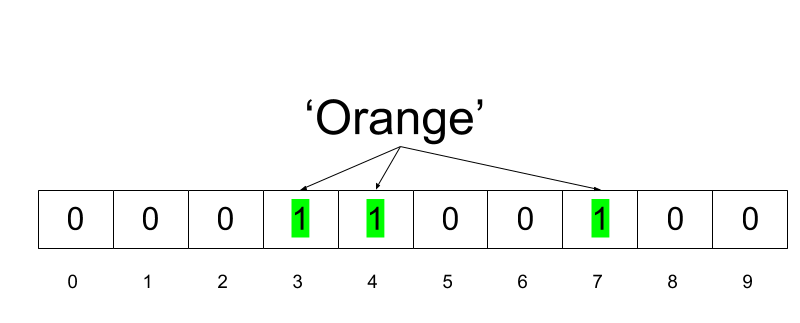

In [49]:
from IPython.display import Image
Image(filename='Orange.png')

When scanning other passwords of our set we will verify if another password already exists in the data structure simply repeating the steps again and checking if the indexes are already set to 1. In this case the password is a duplicate or a probable false positive.
So let's say now we check another word, **'Apple'**. We'll get:

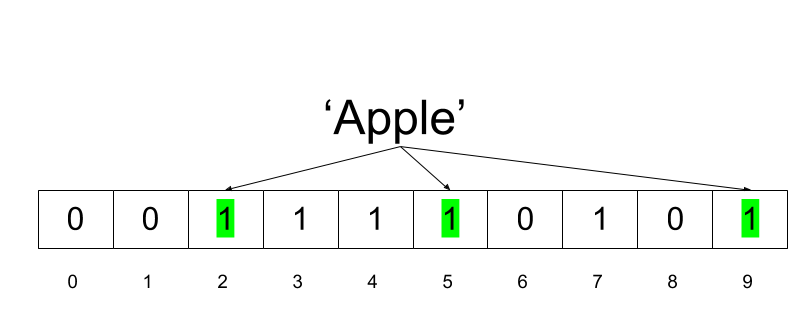

In [51]:
pw2 = 'Apple'
size_bit_array = 10

hash_it(pw2, 0) % size_bit_array = 2
hash_it(pw2, 1) % size_bit_array = 5
hash_it(pw2, 2) % size_bit_array = 9


Image(filename='Apple.png')

But if we will check a password such as **'Gpple'**. There is high probability that the hash functions will generate the same values generated for **'Apple'**, obaining the same indexes. In this case the password will be considered a false positive.

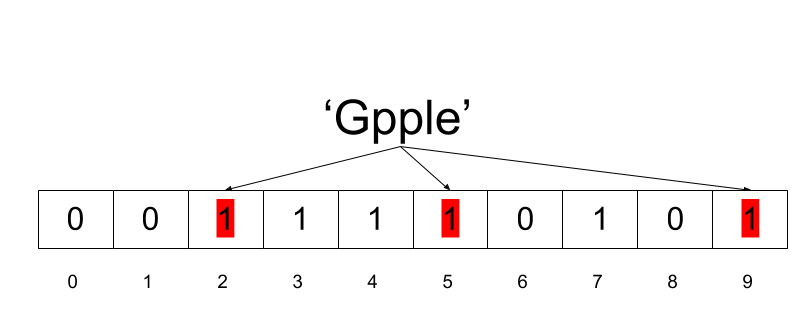

In [53]:
pw3 = 'Gpple'
size_bit_array = 10

#hash_it(pw3, 0) % size_bit_array = 2
#hash_it(pw3, 1) % size_bit_array = 5
#hash_it(pw3, 2) % size_bit_array = 9

from IPython.display import Image
Image(filename='Gpple.png')



So, because bits at calculated indices are already set by some other item, the data structure erroneously claim that 'Gpple' is present and generating a **false positive result**. We can control the probability of getting a false positive by controlling the size of the bit array. **More space means fewer false positives**. If we want decrease probability of false positive result, we have to use more number of hash functions and larger bit array. This would add latency in addition of item and checking membership.

***


# Usage
The following chunks rapresent a possible usage of our implementation of the algorithm.

In [ ]:
import pandas as pd
from SeekDuplicatesAlgorithm import FindDuplicates
import DuplicateModule as dpm
from importlib import reload

Loading the passwords set:

In [24]:
passwords = dpm.loadPw()

In [43]:
passwords[:5]

['OHcv-/U3QI$rdqYTef"D',
 'QtA*.xM$e(+"aO36r&Uo',
 "T;rqw/ou'HN-Pklj6hM*",
 'b%xJ79"A*C5@ehMfS3lu',
 'buI=;LpjBiCm"JS5\'#xy']

Extracting single different characters that occur in all the set of passwords.

In [27]:
l = dpm.extractChar(passwords)

In [44]:
l[:5]

['O', 'H', 'c', 'v', '-']

Creating a dictionary that assigns to each character detected before (considered as keys) to a unique prime number.

In [31]:
wdict = dpm.createDict(l)

The dictionary looks like this:

In [45]:
dict_table = pd.DataFrame.from_dict(wdict, orient="index")
dict_table[:10]

,0
O,267889
H,414569
c,161699
v,493019
-,100663
/,30973
U,109643
3,421403
Q,177197
I,4891


Checking whether the prime numbers inside the dictionary are actually unique. If checkDuplicateKeys() returns an empty list, it means that the values are all unique.

In [33]:
dpm.checkDuplicateKeys(wdict)

[]

Instatiating a FindDuplicates object from the class we implemented that has as parameters the size of the **bitarray**, the **list** of 3 prime numbers that will rapresent the seeds for the hash function, the list of all the **passwords** and the **dictionary** created before.

In [ ]:
dup = FindDuplicates(9000000000, [2, 3, 5], passwords, wdict)

This is the actual usage of the whole algorithm. The two functions that are used are **check()** and **add()**, whenever the check function returns True, it means that the password in process is already stored in the bitarray and we incrementer a counter variable otherwise it means that the password has no duplicate so it's added to the structure. The result will be the counter variable tha rapresents the sum of all the duplicates and the false positive passwords.

In [ ]:
c = 0
for word in range(0, len(passwords)):
    if dup.check(passwords[word]):
        c += 1
    dup.add(passwords[word])
print('The overall number of duplicate strings and false positives are: '{}' '.format(c))